In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from urllib.parse import urlparse

In [ ]:
df = pd.read_csv('data/pnas_art_data.csv')
df.head()

In [3]:
def get_image_url(url):
    try:
        if 'wga' in url:
            image_url_base = url.replace('/html/', '/art/')
            image_url = image_url_base.replace('.html', '.jpg')
            print(f"Retrieved image URL: {image_url}")
            return image_url
        else:
            # Scrape Wikiart
            response = requests.get(url)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, 'html.parser')
                img_tag = soup.find('img', {'itemprop': 'image'})                
                if img_tag and 'src' in img_tag.attrs:
                    image_url = img_tag['src']
                    print(f"Image URL: {image_url}")
                    return image_url
                else:
                    print("Image URL not found.")
            else:
                print(f"Failed to retrieve the page. Status code: {response.status_code}")
                return None
    except Exception as e:
        print(f"Error occurred while converting HTML URL to image URL: {e}")
        return None

In [ ]:
# df['Century'] = (df['Year']//100 + 1).astype(int)

In [4]:
updated_df = pd.read_csv('data/updated_pnas.csv')

In [5]:
updated_df = updated_df.dropna(subset=['img_url'])
updated_df.reset_index(drop=True, inplace=True)

In [6]:
updated_df.head()

,Unnamed: 0,P_idx,Artist,Title,Year,Nationality,Style,DataSrc,url,Img_width,...,I1,I2,Dir1,Dir2,Rc1,Rc2,Line1_(y1y2x1x2_with_top_left_origin),Line2_(y1y2x1x2_with_top_left_origin),Century,img_url
0,11929,0,"Aagaard, carl frederik",The Rose Garden,1877,Danish,Realism,WGA,http://www.wga.hu/html/a/aagaard/rosegard.html,950,...,0.128987,0.084821,h,v,0.347926,0.255000,"(151, 151, 0, 400)","(151, 434, 102, 102)",19,http://www.wga.hu/art/a/aagaard/rosegard.jpg
1,11930,1,"Aagaard, carl frederik",Deer beside a Lake,1888,Danish,Realism,WGA,http://www.wga.hu/html/a/aagaard/deerlake.html,818,...,0.064063,0.058686,h,v,0.852941,0.857500,"(232, 232, 0, 400)","(0, 232, 343, 343)",19,http://www.wga.hu/art/a/aagaard/deerlake.jpg
2,11931,2,"ABBATE, Niccolo dell'",Stag Hunt,1552,Italian,Mannerism,WGA,http://www.wga.hu/html/a/abbate/deerhunt.html,761,...,0.202154,0.103790,h,v,0.429658,0.665000,"(113, 113, 0, 400)","(0, 113, 266, 266)",16,http://www.wga.hu/art/a/abbate/deerhunt.jpg
3,11932,3,"ABBATE, Niccolo dell'",The Rape of Proserpine,1570,Italian,Mannerism,WGA,http://www.wga.hu/html/a/abbate/proserpi.html,820,...,0.132212,0.067208,h,v,0.512894,0.760000,"(179, 179, 0, 400)","(0, 179, 304, 304)",16,http://www.wga.hu/art/a/abbate/proserpi.jpg
4,11933,4,"Abbati, giuseppe",Country Road with Cypresses,1860,Italian,Realism,WGA,http://www.wga.hu/html/a/abbati/abbati2.html,850,...,0.069923,0.079703,h,h,0.157191,0.440476,"(47, 47, 0, 400)","(158, 158, 0, 400)",19,http://www.wga.hu/art/a/abbati/abbati2.jpg


In [7]:
updated_df['Artist'] = updated_df['Artist'].apply(lambda x: x.split(',')[0].strip().title().replace(' ', '') if pd.notnull(x) else "Unknown")

In [8]:
print(len(updated_df['img_url'].unique()))
print(len(updated_df['img_url'].value_counts()))

14852
14852


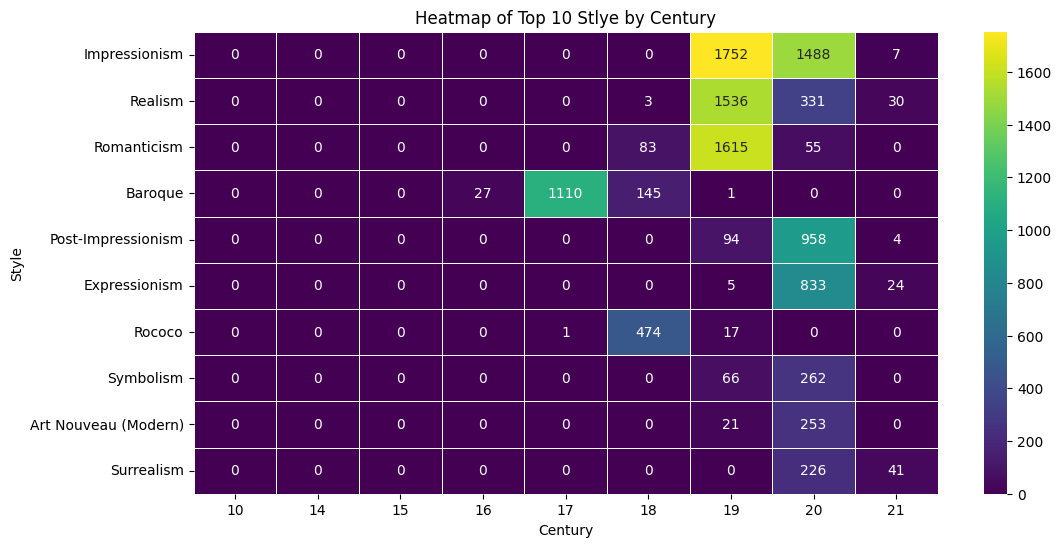

In [9]:
pivot_table = updated_df.pivot_table(index='Style', columns='Century', aggfunc='size', fill_value=0)
nationality_sums = pivot_table.sum(axis=1)
top_styles = nationality_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_styles.index]

plt.figure(figsize=(12, 6))
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Stlye by Century')
plt.xlabel('Century')
plt.ylabel('Style')
plt.show()

In [10]:
updated_df = updated_df[(updated_df['Century'] >= 17) & (updated_df['Century'] <= 20)]

In [10]:
path = 'data/pnas_landscapes_new'

for (century, style), group_df in updated_df.groupby(['Century', 'Style']):
    # Make dir name based on the century and school
    dir_name = f"{century}th_Century_{style}"
    dir_path = os.path.join(path, dir_name)
    os.makedirs(dir_path, exist_ok=True)
    
    # make csv name now and save it in the new dir
    filename = f"{dir_name}.csv"
    filepath = os.path.join(dir_path, filename)
    group_df.to_csv(filepath, index=False)
    
    print(f"Saved: {filepath}")

Saved: data/pnas_landscapes_new/17th_Century_Baroque/17th_Century_Baroque.csv
Saved: data/pnas_landscapes_new/17th_Century_Classicism/17th_Century_Classicism.csv
Saved: data/pnas_landscapes_new/17th_Century_Ink and wash painting/17th_Century_Ink and wash painting.csv
Saved: data/pnas_landscapes_new/17th_Century_Mannerism/17th_Century_Mannerism.csv
Saved: data/pnas_landscapes_new/17th_Century_Mannerism (Late Renaissance)/17th_Century_Mannerism (Late Renaissance).csv
Saved: data/pnas_landscapes_new/17th_Century_Northern Renaissance/17th_Century_Northern Renaissance.csv
Saved: data/pnas_landscapes_new/17th_Century_Northern Renaissance$$Mannerism (Late Renaissance)/17th_Century_Northern Renaissance$$Mannerism (Late Renaissance).csv
Saved: data/pnas_landscapes_new/17th_Century_Rococo/17th_Century_Rococo.csv
Saved: data/pnas_landscapes_new/18th_Century_Baroque/18th_Century_Baroque.csv
Saved: data/pnas_landscapes_new/18th_Century_Baroque$$Romanticism/18th_Century_Baroque$$Romanticism.csv
Save

In [11]:
def download_image(url, save_path, image_name):
    def try_download_image(download_url):
        response = requests.get(download_url, stream=True)
        if response.status_code == 200 and 'image' in response.headers.get('Content-Type', ''):
            return Image.open(BytesIO(response.content))
        else:
            raise Exception(f"Failed to retrieve image from {download_url}")

    try:
        image = try_download_image(url)
    except Exception as UnidentifiedImageError:
        print(f"Failed to retrieve image from {url}, trying altered URL...")
        try:
            altered_url = url.replace('/art/', '/detail/')
            image = try_download_image(altered_url)
        except Exception as e:
            print(e)
            return None
    except Exception as e:
        print(e)
        return None

    if not os.path.exists(save_path):
        os.makedirs(save_path)
    full_path = os.path.join(save_path, image_name)

    # Determine file format from the image_name extension
    file_format = 'JPEG' if image_name.lower().endswith('.jpg') or image_name.lower().endswith('.jpeg') else 'PNG'

    # If the image is in RGBA mode (which is the case for PNGs that support transparency) and we're trying to save as JPEG,
    # convert it to RGB since JPEG doesn't support transparency.
    if image.mode == 'RGBA' and file_format == 'JPEG':
        image = image.convert('RGB')

    image.save(full_path, format=file_format)
    print(f"Image saved to {full_path}")


In [12]:
def process_csv_and_save_images(csv_path, output_folder):
    df = pd.read_csv(csv_path)
    stop = True
    for index, row in df.iterrows():
        # painting324
        # if index == 1164:
        
            
        #     stop = True
        if stop:
            image_filename = f"painting{index}_{row['Title'].replace(' ', '').replace('/', '')}_{row['Year']}__{row['Style']}_{row['Artist']}_{row['Nationality']}.jpg"
            image_url = row['img_url'] 
            download_image(image_url, output_folder, image_filename)

In [14]:
base_dir = 'data/pnas_landscapes_new'
start_processing = False

for century_school_dir in sorted(os.listdir(base_dir)): 
    if century_school_dir == "20th_Century_Realism":
        start_processing = True  # Start processing where error occured
    if start_processing:
        century_school_path = os.path.join(base_dir, century_school_dir)
        if os.path.isdir(century_school_path):
            for file in os.listdir(century_school_path):
                if file.endswith('.csv'):
                    csv_path = os.path.join(century_school_path, file)
                    print(f"Processing {csv_path}")
                    process_csv_and_save_images(csv_path, century_school_path)

Processing data/pnas_landscapes_new/20th_Century_Realism/20th_Century_Realism.csv
Image saved to data/pnas_landscapes_new/20th_Century_Realism/painting0_ForenooninaProvincialTown_1904__Realism_Fenyes_Hungarian.jpg
Image saved to data/pnas_landscapes_new/20th_Century_Realism/painting1_Winter,Monadnock_1900__Realism_AbbottHandersonThayer_American.jpg
Image saved to data/pnas_landscapes_new/20th_Century_Realism/painting2_MonadnockNo.2_1912__Realism_AbbottHandersonThayer_American.jpg
Image saved to data/pnas_landscapes_new/20th_Century_Realism/painting3_Azores_1903__Realism_AbbottHandersonThayer_American.jpg
Image saved to data/pnas_landscapes_new/20th_Century_Realism/painting4_ViewtoMonadnock_1903__Realism_AbbottHandersonThayer_American.jpg
Image saved to data/pnas_landscapes_new/20th_Century_Realism/painting5_VillageStreet,Dominica_1903__Realism_AbbottHandersonThayer_American.jpg
Image saved to data/pnas_landscapes_new/20th_Century_Realism/painting6_Monadnock,WinterSunrise_1919__Realism_